In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as spo

In [3]:
doble = """170 0.008
180 0.008
190 0.008
200 0.007
210 0.007
220 0.007
230 0.007
240 0.008
250 0.011
260 0.016
270 0.018
280 0.016
290 0.012
300 0.008
310 0.009
320 0.008
330 0.008
340 0.019
350 0.029
360 0.034
370 0.032
380 0.024
390 0.012
400 0.007
410 0.009
420 0.012
430 0.025
440 0.039
450 0.047
460 0.047
470 0.036
480 0.022
490 0.009
500 0.009
510 0.012
520 0.03
530 0.05
540 0.062
550 0.06
560 0.049
570 0.028
580 0.011
590 0.007
600 0.01
610 0.025
620 0.045
630 0.059
640 0.061
650 0.053
660 0.036
670 0.017
680 0.009
690 0.008
700 0.018
710 0.038
720 0.053
730 0.06
740 0.054
750 0.04
760 0.022
770 0.009
780 0.008
790 0.015
800 0.031
810 0.04
820 0.044
830 0.039
840 0.029
850 0.017
860 0.01
870 0.008
880 0.009
890 0.01
900 0.008
910 0.008
920 0.008
930 0.009
940 0.009
950 0.009
960 0.008
970 0.009
980 0.009
990 0.009
1000 0.009"""

         Current function value: nan
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


C:\Users\danie\AppData\Local\Temp\ipykernel_22292\3890728766.py:18: RuntimeWarning: invalid value encountered in divide
  y = A*np.cos( B*x )**2 * ( np.sin(C*x)/(C*x) )**2
C:\Users\danie\AppData\Local\Temp\ipykernel_22292\3890728766.py:28: OptimizeWarning: Unknown solver options: tol
  result = spo.minimize(nll, p0, args=(x, y, GetModel), options={"disp": True, "maxiter": 1000, "tol": 1e-6})
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:705: OptimizeWarning: NaN result encountered.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


array([0., 0., 0.])

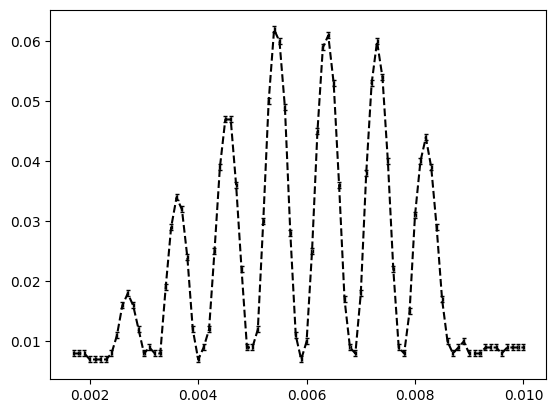

In [4]:
lines = doble.split('\n')
values = [line.split() for line in lines]

data = np.array(values, dtype=float)
x = data[:,0] *1e-5
y = data[:,1]

sigma_y = 0.5e-3
sigma_x = 10e-6
p0 = np.zeros(3)

plt.errorbar(x,y,yerr=sigma_y,xerr=sigma_x, fmt="--",color="black",ecolor='black',capsize=1.3,markersize=5,elinewidth=0.4)

def GetModel(x,p):

    A,B,C = p

    y = A*np.cos( B*x )**2 * ( np.sin(C*x)/(C*x) )**2

    return y

def Chi2(p,x,y,Model):
    return np.sum( ( ( y - Model(x,p) ) )**2 )

nll = lambda *p: Chi2(*p)
nll(p0,x,y,GetModel)

result = spo.minimize(nll, p0, args=(x, y, GetModel), options={"disp": True, "maxiter": 1000, "tol": 1e-6})
result.x